# Paths

## local machine

In [3]:
src_path = '../src'
lib_path = '../lib/'
input_path = '../../kaggle/input/home-credit-default-risk/'

## Google Colab

In [2]:
# # Load the Drive helper and mount
# from google.colab import drive

# # This will prompt for authorization.
# drive.mount('/content/drive')

# # After executing above, Drive files will be accessible in path "/content/drive/MyDrive"

# # Google Colab
# src_path = '/content/drive/MyDrive/kaggle/src'
# lib_path = '/content/drive/MyDrive/kaggle/lib'
# input_path = '/content/drive/MyDrive/kaggle/input/home-credit-default-risk/'

## Kaggle

In [3]:
# # Kaggle
# src_path = '/kaggle/src'
# lib_path = '/kaggle/lib/'
# input_path = '/kaggle/input/home-credit-default-risk/'

# Imports

In [4]:
import pandas as pd
pd.set_option("display.max_columns", 200)

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, RepeatedEditedNearestNeighbours, CondensedNearestNeighbour, NeighbourhoodCleaningRule
from imblearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, TunedThresholdClassifierCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn import set_config
set_config(transform_output="pandas")

from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report, 
                             ConfusionMatrixDisplay, roc_auc_score, make_scorer, 
                             RocCurveDisplay, PrecisionRecallDisplay)

from xgboost import XGBClassifier, XGBRFClassifier

from lightgbm import LGBMClassifier

import joblib
data_processing = joblib.load(lib_path + "data_processing.joblib")
preprocessor = data_processing["preprocessor"]
non_co_cols = data_processing["non_co_cols"]
merged_application_test = data_processing["merged_application_train"]

modelling = joblib.load(lib_path + "modelling.joblib")
model = modelling["model"]

import sys
src_path = '../src'
sys.path.insert(0, src_path)
from eval_classification import eval_classification
del sys.path[0]

In [5]:
# split data
X = merged_application_test.drop(columns=["TARGET", "SK_ID_CURR"])
y = merged_application_test["TARGET"].copy()

In [6]:
# split data 80/20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# fit data on preprocessor
preprocessor.fit(X_train, y_train)

# transform data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [8]:
# drop columns with collinear relationships (Pearson's correlation coefficients > 0.8)
X_train.drop(columns=non_co_cols, inplace=True)
X_test.drop(columns=non_co_cols, inplace=True)

In [9]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warni

CalibratedClassifierCV(cv=10,
                       estimator=FrozenEstimator(estimator=StackingClassifier(estimators=[('hgb',
                                                                                           HistGradientBoostingClassifier(class_weight='balanced',
                                                                                                                          random_state=42,
                                                                                                                          scoring='roc_auc')),
                                                                                          ('xgb',
                                                                                           XGBClassifier(base_score=None,
                                                                                                         booster=None,
                                                                                                         callbacks=None,
                                                                                                         colsample_bylevel=None,
                                                                                                         colsample_bynode=None,
                                                                                                         colsample_bytree=None,
                                                                                                         device=None,
                                                                                                         early_stoppi...
                                                                                                         multi_strategy=None,
                                                                                                         n_estimators=None,
                                                                                                         n_jobs=None,
                                                                                                         num_parallel_tree=None, ...)),
                                                                                          ('rf_cv',
                                                                                           RandomForestClassifier(n_jobs=-1,
                                                                                                                  random_state=42)),
                                                                                          ('gnb',
                                                                                           GaussianNB()),
                                                                                          ('logreg_cv',
                                                                                           LogisticRegressionCV(Cs=100,
                                                                                                                class_weight='balanced',
                                                                                                                cv=8,
                                                                                                                max_iter=1000,
                                                                                                                scoring='roc_auc')),
                                                                                          ('svc',
                                                                                           LinearSVC(class_weight='balanced',
                                                                                                     random_state=42))],
                                                                              n_jobs=-1)),
                       method='isotonic', n_jobs=-1)

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warni

                    Train Evaluation                                       Test Evaluation                   
              precision    recall  f1-score   support                precision    recall  f1-score   support 
                                                                                                             
           0       0.98      0.82      0.89    226132             0       0.96      0.79      0.87     56554 
           1       0.28      0.81      0.42     19876             1       0.20      0.60      0.30      4949 
                                                                                                             
    accuracy                           0.82    246008      accuracy                           0.78     61503 
   macro avg       0.63      0.82      0.66    246008     macro avg       0.58      0.70      0.58     61503 
weighted avg       0.92      0.82      0.85    246008  weighted avg       0.90      0.78      0.82     61503 


/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


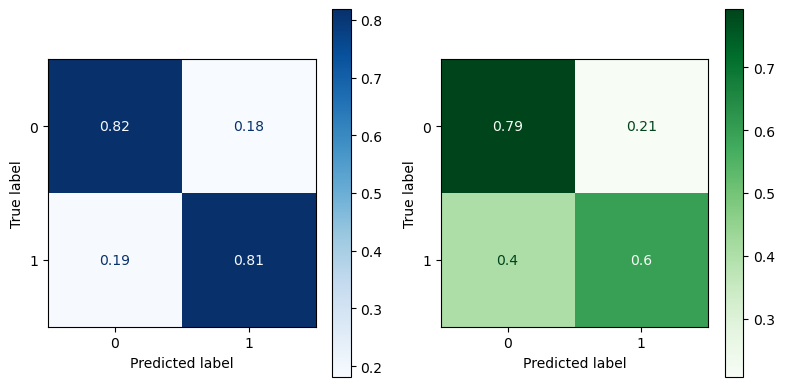

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warni

                    Train Evaluation                                       Test Evaluation                   
              precision    recall  f1-score   support                precision    recall  f1-score   support 
                                                                                                             
           0       0.97      0.87      0.92    226132             0       0.95      0.85      0.90     56554 
           1       0.34      0.74      0.47     19876             1       0.23      0.51      0.32      4949 
                                                                                                             
    accuracy                           0.86    246008      accuracy                           0.82     61503 
   macro avg       0.66      0.81      0.70    246008     macro avg       0.59      0.68      0.61     61503 
weighted avg       0.92      0.86      0.89    246008  weighted avg       0.89      0.82      0.85     61503 


/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


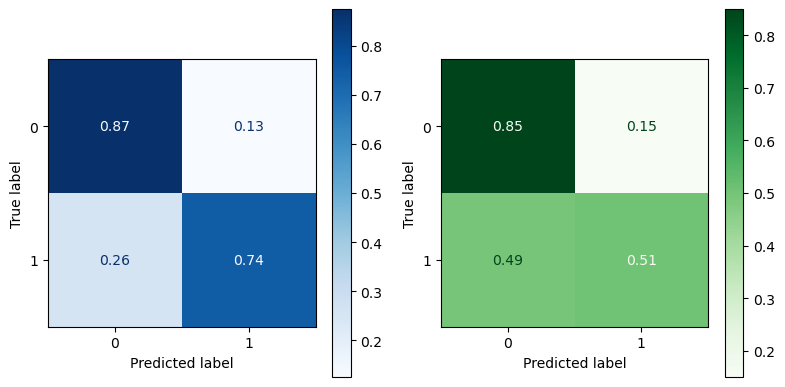

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


KeyboardInterrupt: 

In [21]:
samplers = [RandomUnderSampler(), 
            NearMiss(version=3),
            CondensedNearestNeighbour(random_state=42),
            NeighbourhoodCleaningRule(),
            RandomOverSampler(), 
            SMOTE(), 
            ADASYN()]
# previous_samplers = [None, rUS, NM, RENN, CNN, NCR, ROS, smote]

# for (sampler, previous_sampler) in zip(samplers, previous_samplers):
#     sampler_pipe = make_pipeline(sampler, model).fit(X_train, y_train)
#     [sampler] = eval_classification(sampler_pipe, X_train, y_train, X_test, y_test,
#                                   model_name="model", results_frame=previous_sampler)

for sampler in samplers:
    sampler_pipe = make_pipeline(sampler, model).fit(X_train, y_train)
    eval_classification(sampler_pipe, X_train, y_train, X_test, y_test,
                                  model_name="model")

    #


In [ ]:
model = clf_stack
for under_sampler in [RandomUnderSampler(), 
                      NearMiss(version=3), 
                      RepeatedEditedNearestNeighbours(max_iter=1000), 
                      CondensedNearestNeighbour(random_state=42),
                      NeighbourhoodCleaningRule()]:
    results_frame = pd.DataFrame(index=[under_sampler])
    under_pipe = make_pipeline(under_sampler, model).fit(X_train, y_train)
    results_frame["train_f1"] = f1_score(y_train, under_pipe.predict_proba(X_test)[:, 1]), pos_label=1, average="binary")
    results_frame["test_f1"] = f1_score(y_test, under_pipe.predict_proba(X_test)[:, 1]), pos_label=1, average="binary")
    results_frame["train_auc"] = roc_auc_score(y_train, under_pipe.predict_proba(X_train)[:, 1])
    results_frame["test_auc"] = roc_auc_score(y_test, under_pipe.predict_proba(X_test)[:, 1])
    results = pd.concat([results,results_frame])


for name, clf in zip(names, classifiers):
    print(".",end="",flush=True)
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

In [ ]:
# iterate over classifiers 

for name, clf in zip(names, classifiers): clf = make_pipeline(StandardScaler(), clf) 

clf.fit(X_train, y_train) 

eval_classification2(clf, X_train, y_train, X_test, y_test, 
                     model_name=name, results_frame=None, pos_label=1, 
                     average="binary", roc_auc_average="macro")

## Resampling

In [ ]:
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

In [ ]:
svc = SVC(class_weight="balanced", probability=True, random_state=42)

svc_pipe = make_pipeline(preprocessor, StandardScaler(), svc).fit(X_train, y_train)

svc_results = eval_classification(svc_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="SVC class_weights=\"balanced\"", results_frame=knn_cv_results)

svc_results

In [ ]:
svc_params = {'C' : [0.1, 1, 10, 100, 1000]}
svc_gs = GridSearchCV(svc, svc_params, scoring="roc_auc")
svc_gs.fit(X_train_proc, y_train)
svc_cv = svc_gs.best_estimator_

svc_cv_pipe = make_pipeline(preprocessor, StandardScaler(), svc_cv).fit(X_train, y_train)

svc_cv_results = eval_classification(svc_cv_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="SVC CV class_weights=\"balanced\"", results_frame=svc_results)

svc_cv_results

In [ ]:
test_data_file = "application_test.csv"
application_test = pd.read_csv(input_path + test_data_file)

application_test = pd.merge(application_test, bureau_loans_and_balances, how="left", on="SK_ID_CURR")
# application_test = test_data.drop_duplicates(subset=["SK_ID_CURR"])

ids = application_test.pop("SK_ID_CURR")
preds = svc_pipe.predict_proba(application_test)[:,1]

output = pd.DataFrame({"SK_ID_CURR": ids,
                       "TARGET": preds})

In [ ]:
output

,SK_ID_CURR,TARGET
0,100001,0.338490
1,100005,0.844969
2,100013,0.245391
3,100028,0.571485
4,100038,0.644647
...,...,...
48739,456221,0.273232
48740,456222,0.262137
48741,456223,0.404639
48742,456224,0.395226


In [ ]:
sample_submission_file = "sample_submission.csv"
sample_submission_df = pd.read_csv(input_path + sample_submission_file)
sample_submission_df["TARGET"] = preds
sample_submission_df.to_csv("01_more_data_plus_process.csv", index=False)
sample_submission_df.head()

,SK_ID_CURR,TARGET
0,100001,0.338490
1,100005,0.844969
2,100013,0.245391
3,100028,0.571485
4,100038,0.644647


In [ ]:
# # create a logistic regression
# log_reg = LogisticRegression(max_iter=100000, random_state=42)
# log_reg.fit(X_train_proc, y_train)
# log_reg.predict_proba(X_test_proc)[:,0]

In [ ]:
eval_classification(best_knn, X_train_proc, y_train, X_test_proc, y_test, model_name="best knn", results_frame=None,
                        pos_label=1, average="binary")